In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
# reading the datatset

dataset=pd.read_excel("brazil_train.xlsx")

In [4]:
dataset.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dataset.shape

(5644, 111)

In [6]:
dataset.columns

Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       ...
       'Hb saturation (arterial blood gases)',
       'pCO2 (arterial blood gas analysis)',
       'Base excess (arterial blood gas analysis)',
       'pH (arterial blood gas analysis)',
       'Total CO2 (arterial blood gas analysis)',
       'HCO3 (arterial blood gas analysis)',
       'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
       'ctO2 (arterial blood gas analysis)'],
      dtype='object', length=111)

In [7]:
dataset.describe()

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
count,5644.000000,5644.000000,5644.000000,5644.000000,6.030000e+02,6.030000e+02,6.020000e+02,5.990000e+02,6.020000e+02,6.020000e+02,...,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.000000e+01,2.000000e+01,2.700000e+01
mean,9.318391,0.013997,0.008859,0.007264,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,8.424447e-09,-7.866736e-09,...,-1.379737e-10,8.416397e-09,-1.655685e-09,4.139211e-10,-7.472139e-09,6.070843e-09,-2.469729e-08,4.656613e-09,6.332993e-09,5.243001e-09
std,5.777903,0.117489,0.093713,0.084929,1.000830e+00,1.000830e+00,1.000832e+00,1.000836e+00,1.000832e+00,1.000832e+00,...,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.025978e+00,1.025978e+00,1.019049e+00
min,0.000000,0.000000,0.000000,0.000000,-4.501420e+00,-4.345603e+00,-2.552426e+00,-2.457575e+00,-3.970608e+00,-1.865070e+00,...,-1.999560e+00,-1.244817e+00,-3.082674e+00,-3.568877e+00,-2.925618e+00,-2.985592e+00,-1.175907e+00,-1.532932e+00,-1.480526e+00,-2.900254e+00
25%,4.000000,0.000000,0.000000,0.000000,-5.188074e-01,-5.862439e-01,-6.053457e-01,-6.624832e-01,-5.679496e-01,-7.307069e-01,...,-1.122574e+00,-5.348102e-01,-3.308668e-01,-9.210583e-02,-5.117720e-01,-5.397211e-01,-8.169898e-01,-1.214975e-01,-5.527296e-01,-4.852787e-01
50%,9.000000,0.000000,0.000000,0.000000,5.340703e-02,4.031596e-02,-1.217160e-01,-1.015171e-01,1.385207e-02,-1.426696e-02,...,2.677689e-01,-2.120799e-01,-1.181667e-02,2.942021e-01,7.743482e-02,5.633191e-02,-1.599549e-01,-1.174366e-02,-1.381825e-01,1.826928e-01
75%,14.000000,0.000000,0.000000,0.000000,7.171751e-01,7.295320e-01,5.314981e-01,6.838353e-01,6.661759e-01,5.976919e-01,...,7.383496e-01,2.305214e-02,6.661649e-01,5.115003e-01,4.385609e-01,5.085100e-01,4.500090e-01,-1.174366e-02,2.763648e-01,5.937525e-01
max,19.000000,1.000000,1.000000,1.000000,2.662704e+00,2.671868e+00,9.532034e+00,3.713052e+00,3.645706e+00,3.764100e+00,...,1.337265e+00,3.236524e+00,1.703078e+00,1.042674e+00,1.940087e+00,2.029471e+00,2.205371e+00,2.841856e+00,2.862350e+00,1.826932e+00


# EXPLORATORY DATA ANALYSIS

Exploratory Data Analysis (EDA) is an open-ended process where we calculate statistics and make figures to find trends, anomalies, patterns, or relationships within the data.

<AxesSubplot:>

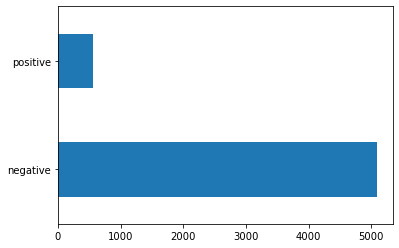

In [8]:
dataset['SARS-Cov-2 exam result'].value_counts().plot.barh()

The dataset is very unbalanced (covid-19 is only present in 90% of the data), so I will consider this during modeling

In [9]:
print("There are {}% target values with Positive".format(100 * dataset['SARS-Cov-2 exam result'].value_counts()[1]/dataset.shape[0]))

There are 9.886605244507441% target values with Positive


# Examine Missing Values

Next we can look at the number and percentage of missing values in each column



In [10]:
dataset.isnull().sum()

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
                                                         ... 
HCO3 (arterial blood gas analysis)                       5617
pO2 (arterial blood gas analysis)                        5617
Arteiral Fio2                                            5624
Phosphor                                                 5624
ctO2 (arterial blood gas analysis)                       5617
Length: 111, dtype: int64

<AxesSubplot:>

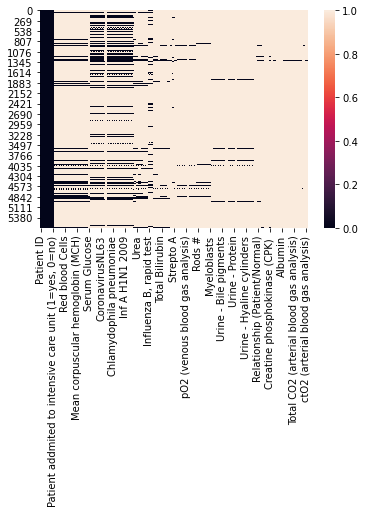

In [11]:
sns.heatmap(dataset.isnull())

In [12]:
pd.pandas.set_option('display.max_columns',None)
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [13]:
missing_data(dataset)

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
Total,0,0,0,0,0,0,5041,5041,5042,5045,5042,5042,5042,5042,5042,5042,5042,5042,5043,5042,5436,4290,4290,4290,4292,4292,4292,5644,4292,4292,4292,4292,4292,4292,4292,4292,4292,4292,4292,5131,5247,5138,5220,5273,5274,4824,4824,5419,5418,5491,5462,5462,5462,5500,5594,5312,5604,5508,5508,5508,5508,5643,5508,5508,5508,5547,5547,5547,5547,5547,5547,5584,5574,5574,5574,5574,5587,5643,5574,5575,5584,5644,5574,5574,5574,5577,5575,5574,5574,5644,5553,5511,5543,5644,5641,5540,5621,5617,5636,5644,5631,5617,5617,5617,5617,5617,5617,5617,5624,5624,5617
Percent,0,0,0,0,0,0,89.3161,89.3161,89.3338,89.387,89.3338,89.3338,89.3338,89.3338,89.3338,89.3338,89.3338,89.3338,89.3515,89.3338,96.3147,76.0099,76.0099,76.0099,76.0454,76.0454,76.0454,100,76.0454,76.0454,76.0454,76.0454,76.0454,76.0454,76.0454,76.0454,76.0454,76.0454,76.0454,90.9107,92.966,91.0347,92.4876,93.4266,93.4444,85.4713,85.4713,96.0135,95.9957,97.2892,96.7753,96.7753,96.7753,97.4486,99.1141,94.1176,99.2913,97.5904,97.5904,97.5904,97.5904,99.9823,97.5904,97.5904,97.5904,98.2814,98.2814,98.2814,98.2814,98.2814,98.2814,98.9369,98.7597,98.7597,98.7597,98.7597,98.9901,99.9823,98.7597,98.7775,98.9369,100,98.7597,98.7597,98.7597,98.8129,98.7775,98.7597,98.7597,100,98.3877,97.6435,98.2105,100,99.9468,98.1573,99.5925,99.5216,99.8583,100,99.7697,99.5216,99.5216,99.5216,99.5216,99.5216,99.5216,99.5216,99.6456,99.6456,99.5216
Types,object,int64,object,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,object,object,object,float64,object,object,object,object,

In [14]:
# Number of each type of column
dataset.dtypes.value_counts()

float64    70
object     37
int64       4
dtype: int64

In [15]:
# Number of unique classes in each object column
dataset.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Patient ID                     5644
SARS-Cov-2 exam result            2
Respiratory Syncytial Virus       2
Influenza A                       2
Influenza B                       2
Parainfluenza 1                   2
CoronavirusNL63                   2
Rhinovirus/Enterovirus            2
Coronavirus HKU1                  2
Parainfluenza 3                   2
Chlamydophila pneumoniae          2
Adenovirus                        2
Parainfluenza 4                   2
Coronavirus229E                   2
CoronavirusOC43                   2
Inf A H1N1 2009                   2
Bordetella pertussis              2
Metapneumovirus                   2
Parainfluenza 2                   1
Influenza B, rapid test           2
Influenza A, rapid test           2
Strepto A                         3
Urine - Esterase                  2
Urine - Aspect                    4
Urine - pH                       15
Urine - Hemoglobin                3
Urine - Bile pigments             2
Urine - Ketone Bodies       

# Correlations

Now that we have dealt with the categorical variables and the outliers, let's continue with the EDA. One way to try and understand the data is by looking for correlations between the features and the target. We can calculate the Pearson correlation coefficient between every variable and the target using the .corr dataframe method.

In [16]:
dataset.corr()

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Mycoplasma pneumoniae,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Density,Urine - Sugar,Urine - Red blood cells,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
Patient age quantile,1.000000,0.046166,0.015736,-0.035772,0.096808,0.060320,-0.158683,0.119449,-0.037510,-0.125935,-0.124671,-0.166386,0.107525,0.197394,0.022085,0.281655,0.050962,0.166429,0.215857,NaN,0.086923,0.338425,0.088205,0.372614,0.001904,-0.004909,0.128795,0.038809,0.224382,0.145813,0.268306,0.008057,-0.480906,-0.309841,-0.127646,0.208016,-0.059379,0.555328,-0.071306,NaN,0.503174,0.256466,0.510971,0.046603,0.284189,1.300393e-01,0.179179,0.089347,NaN,-0.118386,NaN,0.159676,NaN,-0.122878,0.014032,-0.149753,NaN,0.981118,-0.100993,0.395562,0.097130,-0.357362,NaN,-0.137290,-0.223949,-0.469049,0.570445,0.570755,0.086133,0.166245,-0.098422,-0.334562,-0.511705,-0.061265
"Patient addmited to regular ward (1=yes, 0=no)",0.046166,1.000000,-0.011264,-0.010192,-0.087241,-0.091867,-0.183091,-0.013134,-0.053143,-0.095313,-0.034642,-0.103005,0.031833,-0.050703,-0.085636,-0.039326,-0.000354,0.102160,0.058746,NaN,0.127431,-0.012487,0.132841,0.085025,-0.027274,-0.087195,-0.003844,-0.006920,0.032191,-0.030038,-0.009977,-0.039898,-0.055231,-0.186539,-0.005717,-0.136158,-0.088179,0.041685,-0.070782,NaN,-0.040536,0.180598,-0.033669,0.084794,0.063084,-3.059950e-02,-0.034277,-0.069894,NaN,-0.202388,NaN,-0.048520,NaN,0.023895,-0.100331,0.117764,NaN,NaN,-0.080470,0.410411,-0.076085,0.315823,NaN,NaN,0.198186,-0.226778,0.033456,0.203640,-0.159803,-0.133434,0.105608,-0.173663,NaN,0.273102
"Patient addmited to semi-intensive unit (1=yes, 0=no)",0.015736,-0.011264,1.000000,-0.008087,-0.182215,-0.177142,0.006966,-0.023475,-0.137951,-0.110574,-0.023390,0.138304,-0.132984,-0.054479,-0.089780,-0.050871,-0.037916,0.092406,0.198328,NaN,0.087390,0.081907,0.241026,-0.033972,-0.013936,-0.127343,0.022051,0.084546,0.158065,0.026549,0.059037,-0.007131,0.296299,0.033610,-0.007857,-0.160453,0.151258,-0.026309,0.183427,NaN,-0.104426,0.136008,-0.097108,0.184783,0.082809,2.386304e-01,0.278811,0.416115,NaN,-0.141116,NaN,0.394227,NaN,-0.183185,0.083214,0.191216,NaN,0.615038,-0.001060,0.084403,0.024391,NaN,NaN,-0.661111,-0.559117,0.113153,-0.226234,-0.178971,-0.112624,-0.136503,-0.338690,-0.091269,0.185231,-0.049042
"Patient addmited to intensive care unit (1=yes, 0=no)",-0.035772,-0.010192,-0.008087,1.000000,-0.183850,-0.178878,0.125953,-0.073511,-0.120659,-0.109867,-0.036227,0.271681,-0.12

In [24]:
# Find correlations with the target and sort
correlations = dataset.corr()['SARS-Cov-2 exam result']

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

KeyError: 'SARS-Cov-2 exam result'

In [ ]:
features = dataset.columns.values[2:112]
corrs_ = dataset[features].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
corrs_ = corrs_[corrs_['level_0'] != corrs_['level_1']]
corrs_.head(10)

Text(0.5, 1.0, 'Clustermap')

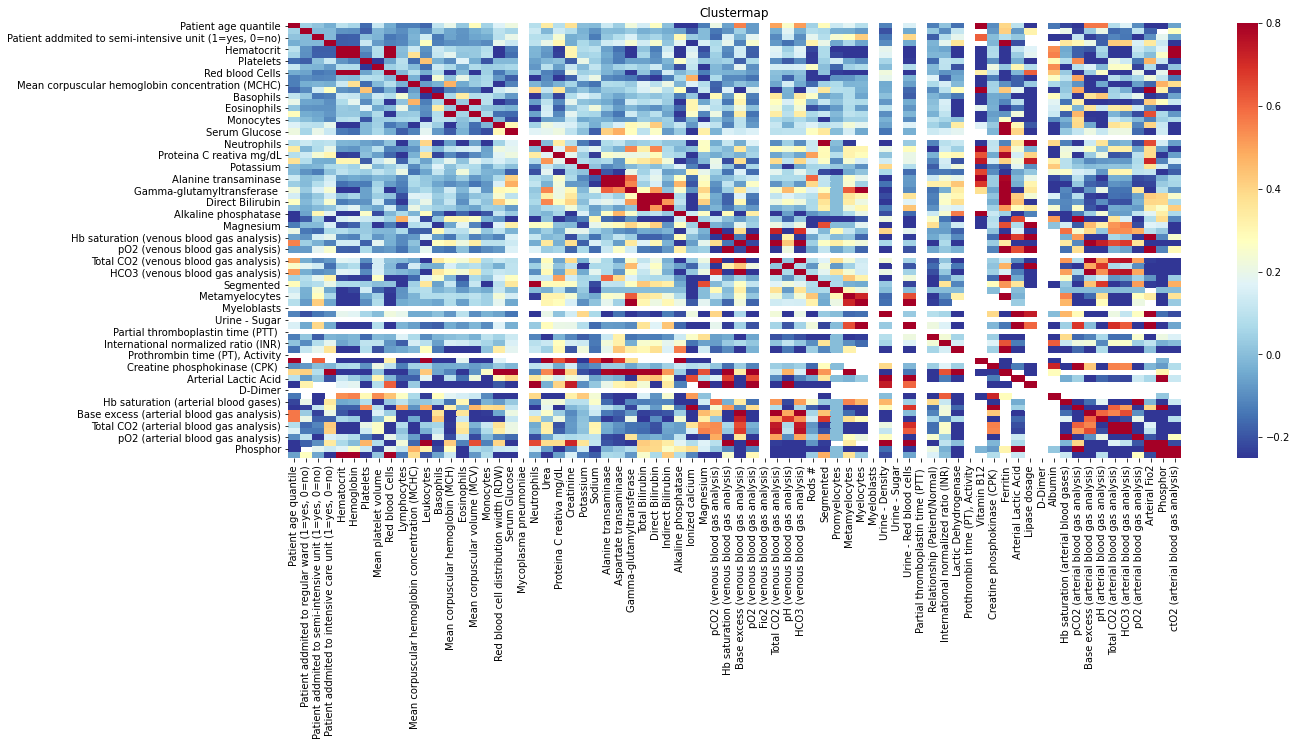

In [18]:
corrs = dataset.corr()
plt.figure(figsize = (20, 8))
# Heatmap of correlations
sns.heatmap(corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = False, vmax = 0.8)
plt.title('Clustermap')

# VISUALIZATIONS

Patient age quantile by sars cov2 exam result

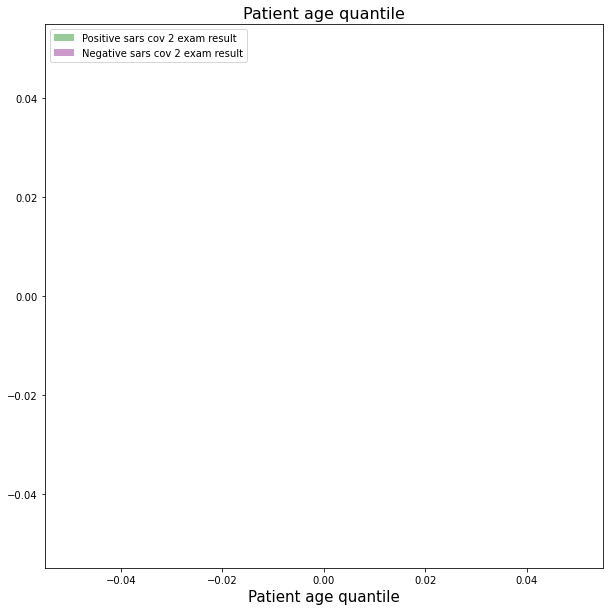

In [25]:
def plot_dist_col(column):
    pos__df = dataset[dataset['SARS-Cov-2 exam result'] ==1] 
    neg__df = dataset[dataset['SARS-Cov-2 exam result'] ==0]

    '''plot dist curves for train and test weather data for the given column name'''
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.distplot(pos__df[column].dropna(), color='green', ax=ax).set_title(column, fontsize=16)
    sns.distplot(neg__df[column].dropna(), color='purple', ax=ax).set_title(column, fontsize=16)
    plt.xlabel(column, fontsize=15)
    plt.legend(['Positive sars cov 2 exam result', 'Negative sars cov 2 exam result'])
    plt.show()
plot_dist_col('Patient age quantile')

# Encoding Variables

Label Encoding

Label encoding assigns each unique value to a different integer.

This approach assumes an ordering of the categories: "Never" (0) < "Rarely" (1) < "Most days" (2) < "Every day" (3). This assumption makes sense in this example, because there is an indisputable ranking to the categories. Not all categorical variables have a clear ordering in the values, but we refer to those that do as ordinal variables. For tree-based models (like decision trees and random forests), you can expect label encoding to work well with ordinal variables.